# Notas e Exercícios de Aula - #02
# MAC5768 - Visão e Processamento de Imagens - IME-USP
### 1º Semestre 2024
### Prof. Ronaldo Fumio Hashimoto
#### Marcus V. F. Laranjeira # USP 5383459
#### _mvlaran@usp.br_

Notas e exercícios baseados no conteúdo de aulas - Capítulo 3 do Livro Texto

Dadas as imagens de entrada $f(x, y)$ e saída $g(x, y)$, o operador T de transformação pixel à pixel é o operador $T$

$$g(x, y) = T[f(x, y)]$$

tal que faz um mapeamento da intensidade $r$ do pixel de $f(x, y)$ para a intensidade $s$ do pixel de $g(x, y)$.

Existem 3 tipos básicos de função usadas frequentemente em processamento de imagem:
* **Linear**: identidade e negativo
* **Logarítmica**: transformações log e exponensial (log inverso)
* **Potências**: n-ésima potência ou n-ésima raiz

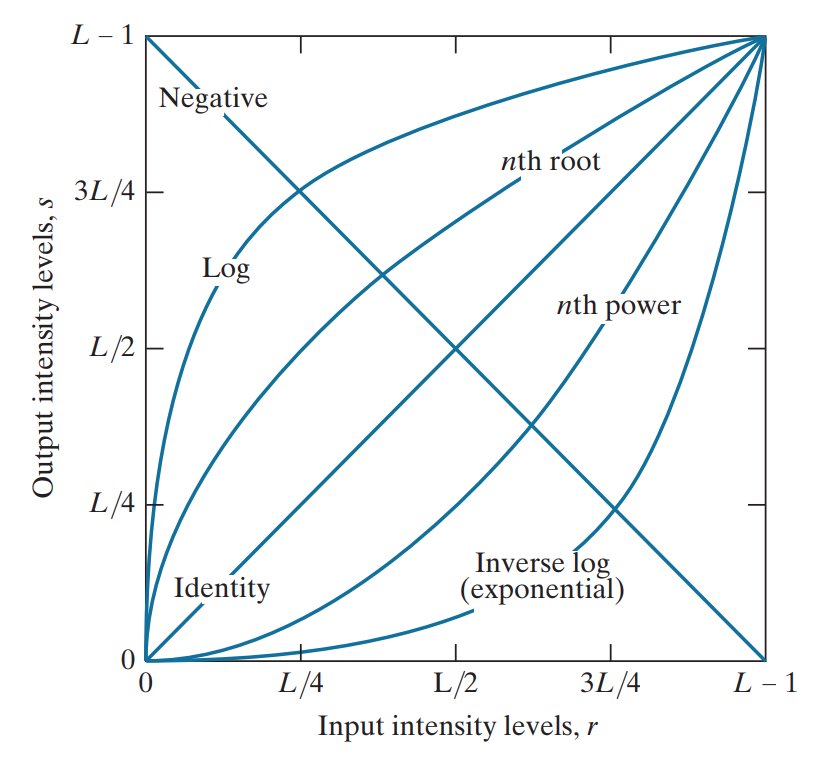
<center>
    <sub>imagem do livro Digital Imagem Processing 4ª edição (Edição Global) - Rafael Gonzalez - 2018</sub>
</center>

onde L-1 é o nível máximo de intensidade.

Vamos explorar alguns exemplos destas transformações.

In [1]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plt

from rep_funcs import *

In [2]:
caminho_imagens = "./Imagens/transform/"

## Transformação: negativo

In [3]:
img_breast = tiff.imread(caminho_imagens + "breast_digital_xray.tif")

In [4]:
img_breast.dtype

dtype('uint8')

In [5]:
img_breast = img_breast.astype(np.int32)

In [6]:
img_breast.dtype

dtype('int32')

In [7]:
img_breast.shape

(571, 482)

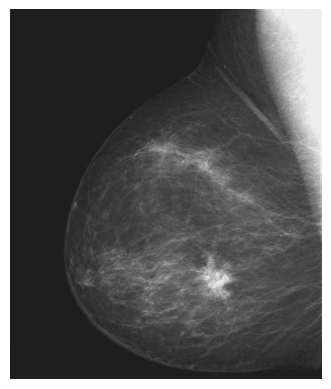

In [8]:
exibe_imagem(img_breast)

In [9]:
img_breast_neg = 255 - img_breast

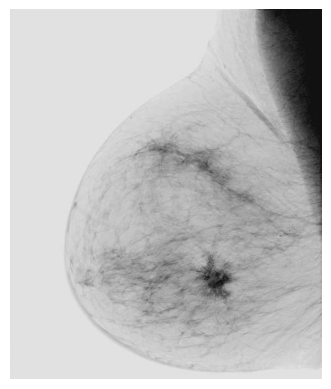

In [10]:
exibe_imagem(img_breast_neg)

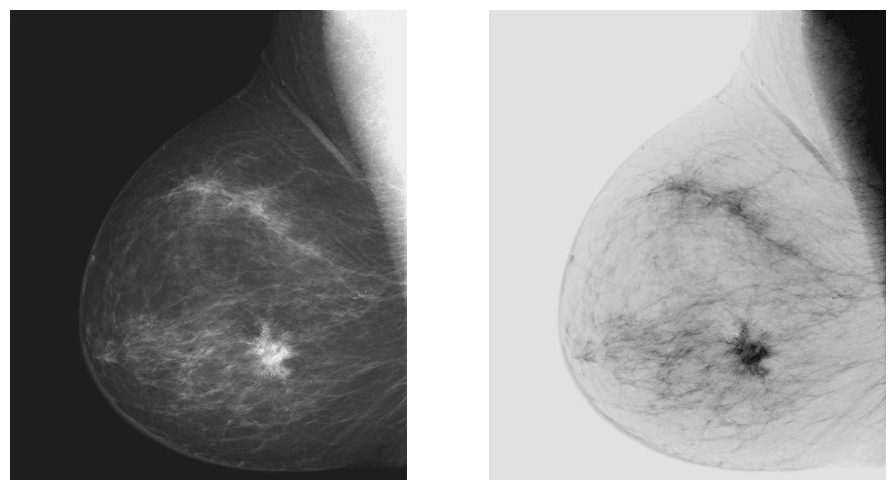

In [11]:
exibe_duas_imagens(img_breast, img_breast_neg)

Ao executar `img_breast_neg = 255 - img_breast` o sistema internamente faz pixel a pixel a conta subtraindo 255 do valor da intensidade do pixel da imagem original.

Para fins de estudo, vou refazer a transformação percorrendo cada um dos pixels, realizando a conta e então atribuindo ao pixel correspondente na matriz de destino

In [12]:
# Cria uma nova imagem com a mesma dimensão da imagem original, e zero em todos os pixels
img_breast_neg = np.zeros_like(img_breast)

img_breast_neg.shape

(571, 482)

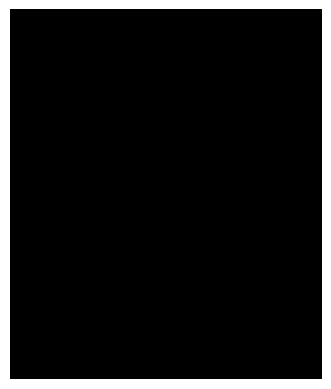

In [13]:
# Verificamos se a imagem está realmente "vazia"
exibe_imagem(img_breast_neg)

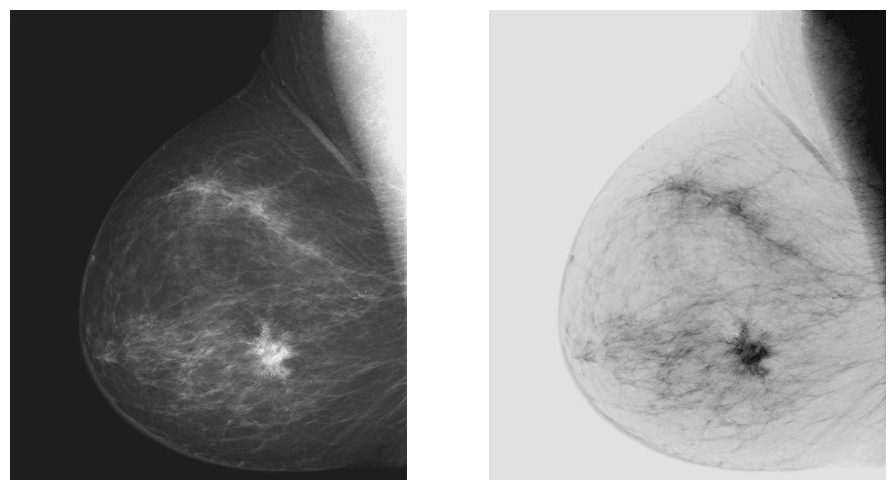

In [14]:
# Definimos uma função que, dada a intensidade original, devolve a intensidade transformada
def pixel_negativo(valor_pixel):
    return 255 - valor_pixel

# Fazemos iteração linha a linha, coluna a coluna para percorrer todos os pixels
for linha in range(img_breast.shape[0]):
    for coluna in range(img_breast.shape[1]):
        # recuperamos o valor do pixel original
        valor_pixel = img_breast[linha, coluna]
        # Transformamos o valor do pixel original de acordo com a função
        valor_transformado = pixel_negativo(valor_pixel)
        img_breast_neg[linha, coluna] = valor_transformado
        
exibe_duas_imagens(img_breast, img_breast_neg)

## Generalizar a função para demais estudos

Para generalizar e facilitar os estudos das demais transformações, criamos uma função que recebe uma imagem original e uma função transformadora (operador) e então ela retorna a imagem transformada.

In [15]:
def transforma_imagem(imagem_original = None, funcao = None, args = {}):
    if imagem_original is None:
        return None
    if funcao is None or not callable(funcao):
        return None

    imagem_transformada = np.zeros_like(imagem_original)
    
    for linha in range(imagem_original.shape[0]):
        for coluna in range(imagem_original.shape[1]):
            # recuperamos o valor do pixel original
            valor_pixel = imagem_original[linha, coluna]
            # Transformamos o valor do pixel original de acordo com a função
            valor_transformado = funcao(valor_pixel, **args)
            imagem_transformada[linha, coluna] = valor_transformado
    
    return imagem_transformada

In [16]:
# Testamos a nova função
imagem_negativa = transforma_imagem(img_breast, pixel_negativo)

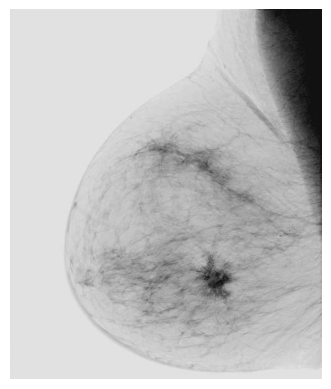

In [17]:
exibe_imagem(imagem_negativa)

## Transformação Logarítmica

A função geral para essa transformação é dada por $$ s = c \cdot log(1 + r) $$

E essa transformação mapeia uma faixa estreita de valores de baixa intensidade na imagem de entrada à uma gama mais ampla de níveis de saída.

In [18]:
img_original_log = tiff.imread(caminho_imagens + "fourier_spectrum.tif")
# Transformamos os dados da imagem carregada para float32 de modo à conseguir trabalhar
img_original_log = img_original_log.astype(np.float32)

In [19]:
# Definimos uma função que, dada a intensidade original, devolve a intensidade transformada usando logaritmo 
def pixel_log(valor_pixel, c = 1):
    # a função numpy log1p é igual à log(1+x)
    return c * np.log1p(valor_pixel)

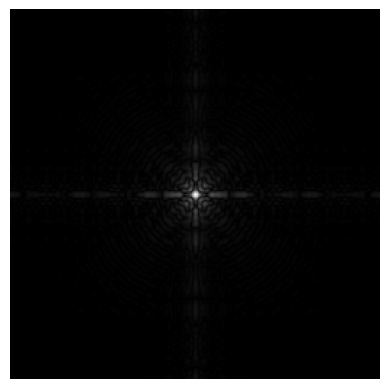

In [20]:
exibe_imagem(img_original_log)

In [21]:
img_transformada_log = transforma_imagem(img_original_log, pixel_log)
print(np.max(img_transformada_log))
print(np.min(img_transformada_log))

5.5451775
0.0


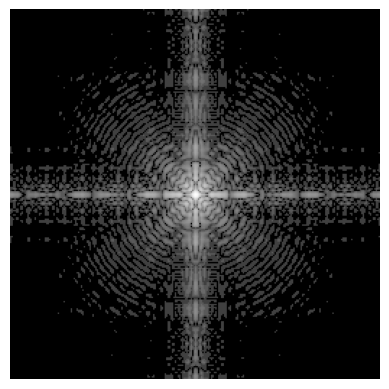

In [22]:
im_escala_transf_log = ((img_transformada_log - np.min(img_transformada_log)) / np.max(img_transformada_log - np.min(img_transformada_log))) * 255

exibe_imagem(im_escala_transf_log)

#### Para fins de comparação, mostramos a imagem original, a imagem transformada por log e a imagem transformada por log e por negativo

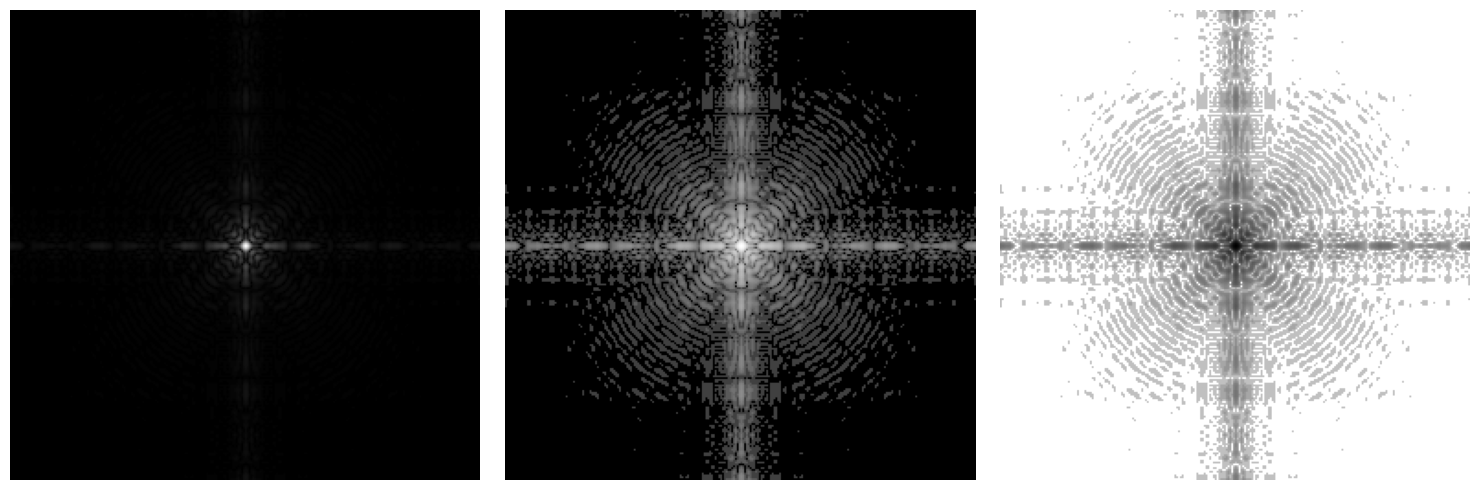

In [23]:
exibe_tres_imagens(img_original_log, im_escala_transf_log, transforma_imagem(im_escala_transf_log, pixel_negativo))

## Transformações de Potência

As transformações de potência tem como função geral $$ s = c \cdot r^\gamma $$ onde $c$ e $\gamma$ são constantes positivas. Eventualmente a equação pode ser escrita na forma $$ s = c \cdot (\epsilon + r) ^ \gamma $$ onde $\epsilon$ é um deslocamento para corrigir problemas quando a entrada for $0$.

Quando o valor de $\gamma$ é menor que $1$, as transformações de potência ampliam a faixa de valores de entrada mais escuros para uma faixa de valores de saída mais clara, o que aumenta o brilho aparente da imagem. Por outro lado, quando o valor de $\gamma$ é maior que $1$, as transformações têm o efeito oposto, reduzindo o brilho aparente da imagem.

In [24]:
# Ao carregar as imagens, como trataremos de transformações com potências, valores podem estourar os 255 níveis 
# de cinza em que assumimos que estamos trabalhando, desta forma, mudo para int 32 e escalo de volta para 255
# tons de maneira à não perder a transformação

degrade = tiff.imread(caminho_imagens + "intensity_ramp.tif")
degrade = degrade.astype(np.int32)

espinha = tiff.imread(caminho_imagens + "fractured_spine.tif")
espinha = espinha.astype(np.int32)

In [25]:
# Definição da função de potência
def potencia(valor_pixel, c = 1, epsilon = 0, gamma = 1):
    return c * (epsilon + valor_pixel) ** gamma

In [26]:
# Definição de função de escala
def escala_255(imagem):
    return ((imagem - np.min(imagem)) / np.max(imagem - np.min(imagem))) * 255

### Exemplos de transformação gamma com imagem degradê (0-255)

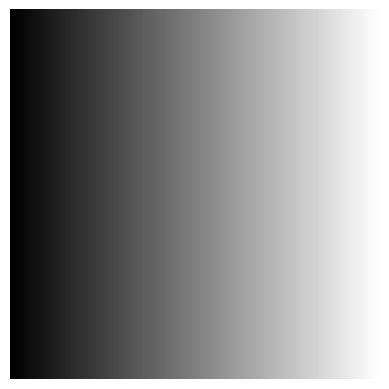

In [27]:
exibe_imagem(degrade)

In [28]:
gamma05 = transforma_imagem(degrade, potencia, {'c': 1, 'epsilon': 0, 'gamma': 0.5})
gamma15 = transforma_imagem(degrade, potencia, {'c': 1, 'epsilon': 0, 'gamma': 1.5})
gamma25 = transforma_imagem(degrade, potencia, {'c': 1, 'epsilon': 0, 'gamma': 2.5})

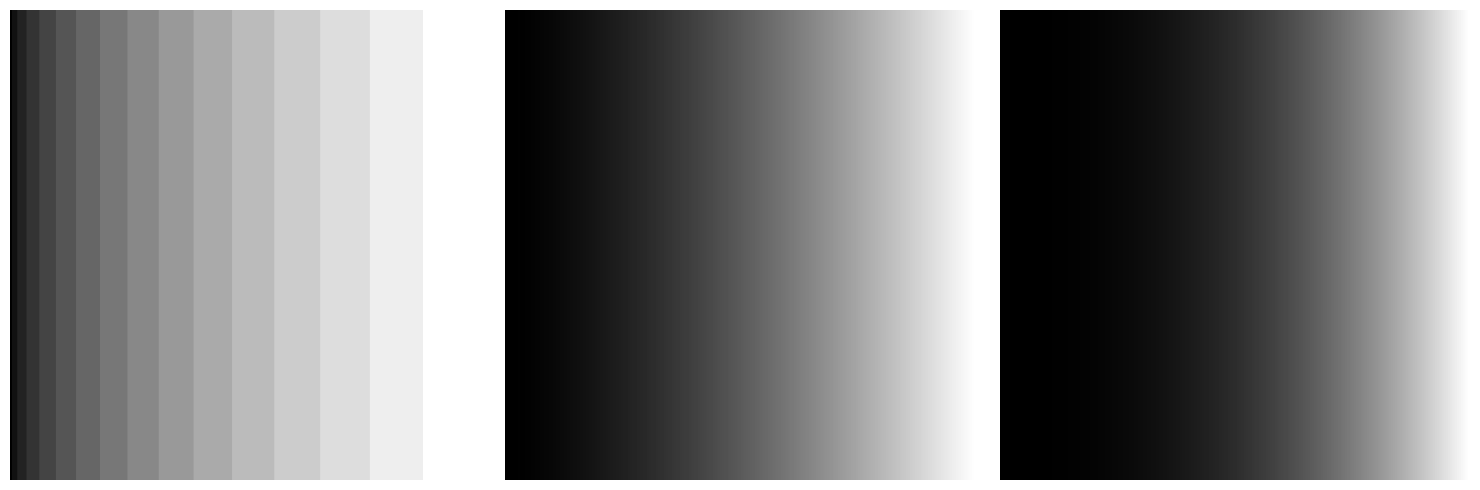

In [29]:
exibe_tres_imagens(escala_255(gamma05), escala_255(gamma15), escala_255(gamma25))

### Exemplo de melhoria de contraste usando uma imagem de Ressonância Magnética da Espinha

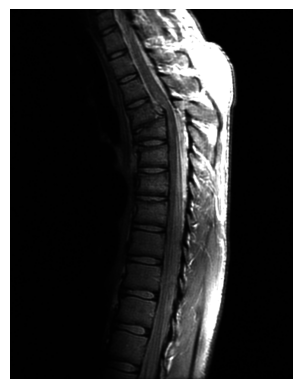

In [30]:
exibe_imagem(espinha)

In [31]:
espinha_pot06 = transforma_imagem(espinha, potencia, {'c': 1, 'epsilon': 0, 'gamma': 0.6})
espinha_pot04 = transforma_imagem(espinha, potencia, {'c': 1, 'epsilon': 0, 'gamma': 0.4})
espinha_pot03 = transforma_imagem(espinha, potencia, {'c': 1, 'epsilon': 0, 'gamma': 0.3})

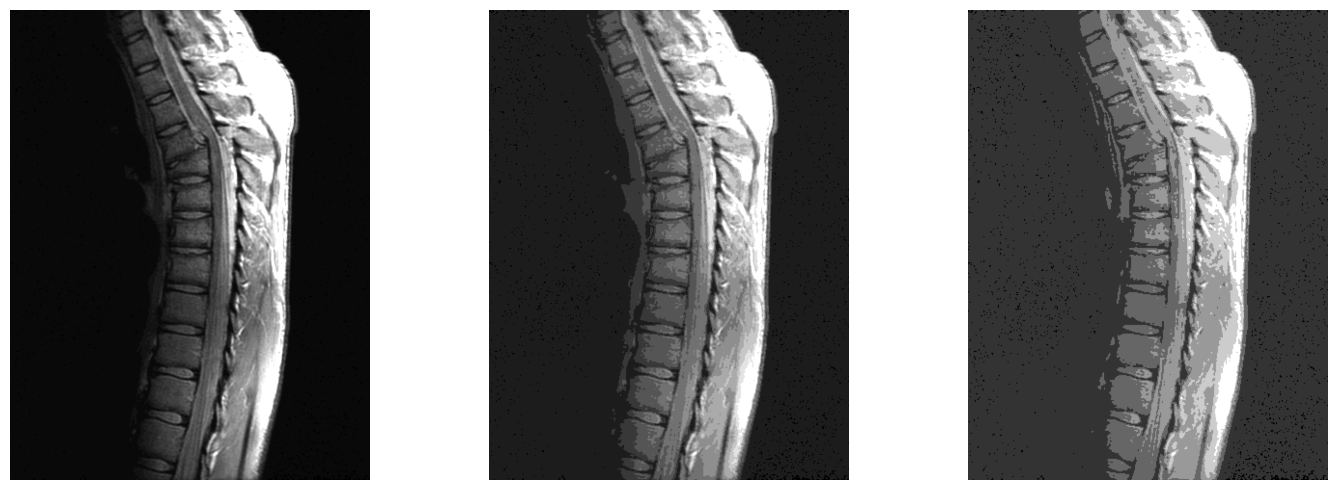

In [32]:
exibe_tres_imagens(escala_255(espinha_pot06), escala_255(espinha_pot04), escala_255(espinha_pot03))

Dá pra perceber a melhoria na visualização dos detalhes, porém para gama em 0.3 percebe-se que o background começa a ficar esmaecido, como se estivesse lavado. Para o conforto dos olhos na visualização dos detalhes da fratura, o valor de 0.4 para gamma, neste caso, parece ser o mais adequado.

### Exemplo de correção de imagem "lavada" com correção Gamma

In [33]:
# Para este exemplo, iremos utilizar valores de gamma altos (3, 4 e 5), podendo assumir valores tão altos que estourem 
# int32, desta forma, utilizaremos int 64
aerial = tiff.imread(caminho_imagens + "aerial.tif")
aerial = aerial.astype(np.int64)

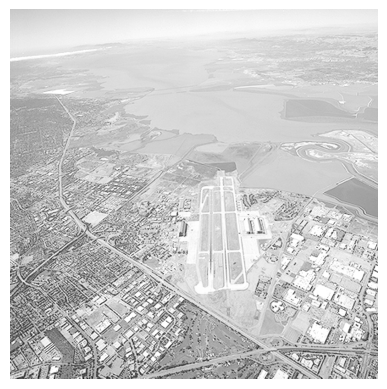

In [34]:
exibe_imagem(aerial)

In [35]:
aerial_3 = transforma_imagem(aerial, potencia, {'c': 1, 'epsilon': 0, 'gamma': 3})
aerial_4 = transforma_imagem(aerial, potencia, {'c': 1, 'epsilon': 0, 'gamma': 4})
aerial_5 = transforma_imagem(aerial, potencia, {'c': 1, 'epsilon': 0, 'gamma': 5})

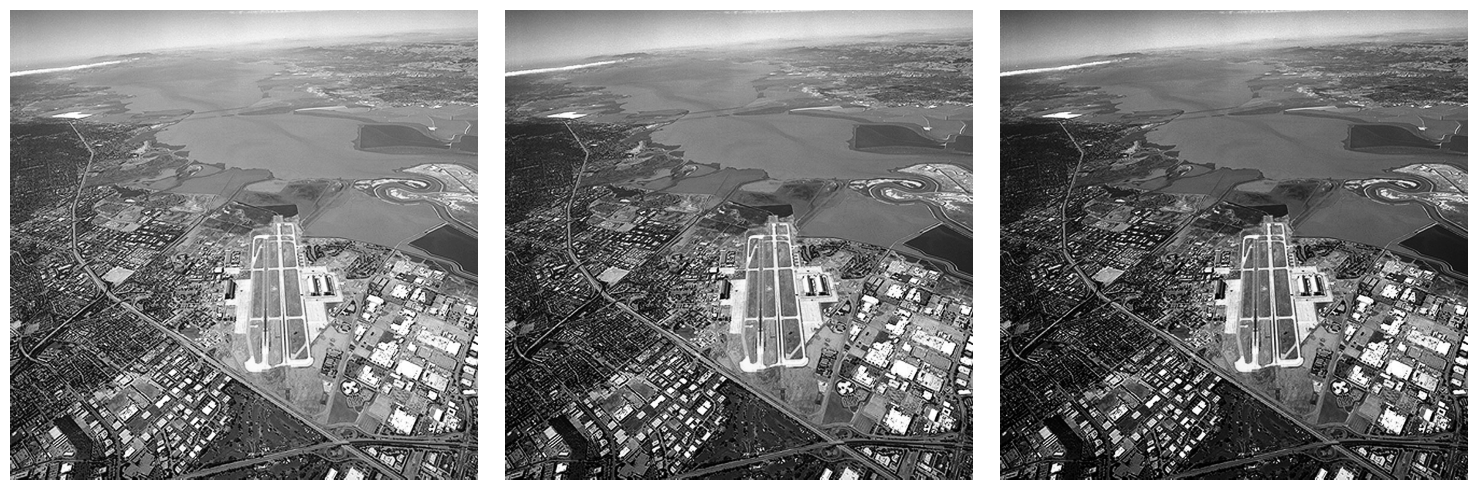

In [36]:
exibe_tres_imagens(escala_255(aerial_3), escala_255(aerial_4), escala_255(aerial_5))

A imagem original "estourada" melhora contraste e evidencia detalhes a medida que utilizamos valores para gamma maiores. Com gamma 5, os detalhes ficam mais evidentes devido à melhoria do contraste.

## Transformação Piecewise Linear

Ou transformações lineares segmentadas.

São transformações em que divide-se o _range_ de intensidade de define-se uma função linear diferente em cada segmento:

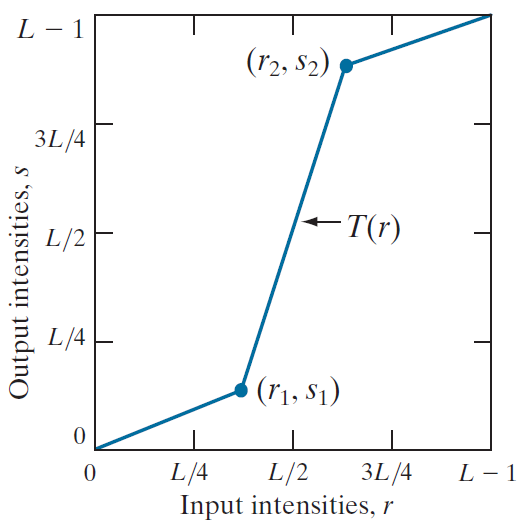

In [37]:
pollen_lavado = tiff.imread(caminho_imagens + "pollen_washed.tif")

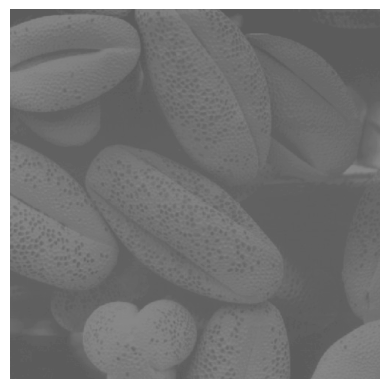

In [38]:
exibe_imagem(pollen_lavado)

Vamos definir uma função segmentada, inspirada no uso da ferramenta "curvas" do Photoshop conforme abaixo:

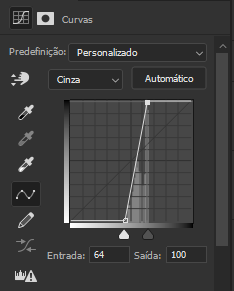

de forma à melhorar essa imagem. 

Para a função vamos dividir os valores de entrada em três intervalos:

1. De 0 a 90, onde a função retorna sempre 0.
2. De 91 a 160, onde a função é uma reta que vai de 0 a 255.
3. De 161 a 255, onde a função retorna sempre 255.

Primeiro, vamos encontrar a equação da reta para o intervalo de 91 a 160, que é onde a função é uma linha reta que vai de 0 a 255. Para encontrar a equação dessa reta, vamos usar os pontos de extremidade $(91, 0)$ e $(160, 255)$:

$$ m = \frac{{f(x_2) - f(x_1)}}{{x_2 - x_1}} = \frac{{255 - 0}}{{160 - 91}} = \frac{{255}}{{69}} $$

Então, a equação da reta será dada por $ f(x) = \frac{{255}}{{69}}(x - 91) $ para $ 91 \leq x \leq 160 $.

In [39]:
# Definição da função segmentada (piecewise function)
def piecefunc(valor_pixel):
    # Desencargo, por que a entrada sempre será positiva
    if valor_pixel < 0:
        return 0
    elif 0 <= valor_pixel <= 90:
        return 0
    elif 91 <= valor_pixel <= 160:
        return (255 / 69) * (valor_pixel - 91)
    elif valor_pixel >= 161:
        return 255

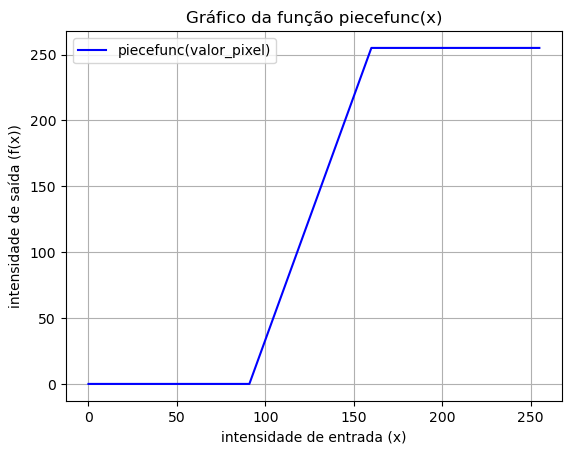

In [40]:
# Para entender a função, mostramos o gráfico dela com matplotlib:

# domínio
dominio = np.arange(0, 256)

# Aplicando a função a cada valor de x
imagem = [piecefunc(x) for x in dominio]

# Criando o gráfico
plt.plot(dominio, imagem, label='piecefunc(valor_pixel)', color='blue')
plt.xlabel('intensidade de entrada (x)')
plt.ylabel('intensidade de saída (f(x))')
plt.title('Gráfico da função piecefunc(x)')
plt.grid(True)
plt.legend()

# Mostrando o gráfico
plt.show()

In [41]:
pollen_transf = transforma_imagem(pollen_lavado, piecefunc)

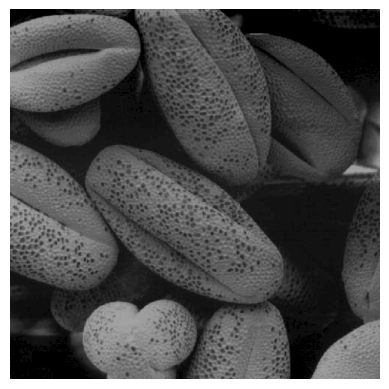

In [42]:
exibe_imagem(pollen_transf)

Como pode se notar, temos um contraste bem melhorado com essa técnica.

## Contrast Stretching

Técnica de processamento de imagem que consiste em "espalhar" a distribuição das intensidades dos pixels de forma que os pixels não estejam concentrados num pequeno intervalo de intensidades. A técnica visa aumentar o contraste da imagem, expandindo a faixa de intensidades de pixel para ocupar todo o intervalo disponível.

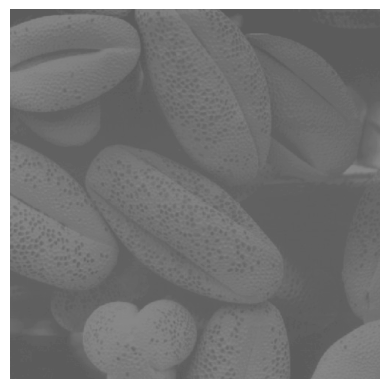

In [43]:
# Para esta transformação, continuaremos usando a imagem do polem, originalmente "lavada"
exibe_imagem(pollen_lavado)

In [44]:
print("Intensidade mínima na imagem original: " + str(np.min(pollen_lavado)))
print("Intensidade máxima na imagem original: " + str(np.max(pollen_lavado)))

Intensidade mínima na imagem original: 91
Intensidade máxima na imagem original: 138


In [45]:
# vamos escalar a imagem de maneira que sua distribuição ocupe o intervalo entre 0 e 255 e não apenas 91 à 138
# Sejam r_min e r_max respectivamente a intensidade mínima e o máxima da imagem original e s_min e s_max
# respectivamente a intensidade mínima e máxima que queremos que a imagem ocupe, temos:

r_min = np.min(pollen_lavado)
r_max = np.max(pollen_lavado)
s_min = 0
s_max = 255
stretched_pollen = ((pollen_lavado - r_min) / (r_max - r_min)) * (s_max - s_min) + s_min

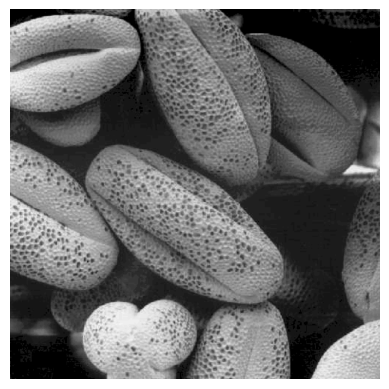

In [46]:
exibe_imagem(stretched_pollen)

Como podemos ver, o contraste melhorou muito e a imagem ficou muito mais agradável. Para ilustrar melhor a transformação, vamos comparar os histogramas antes e depois

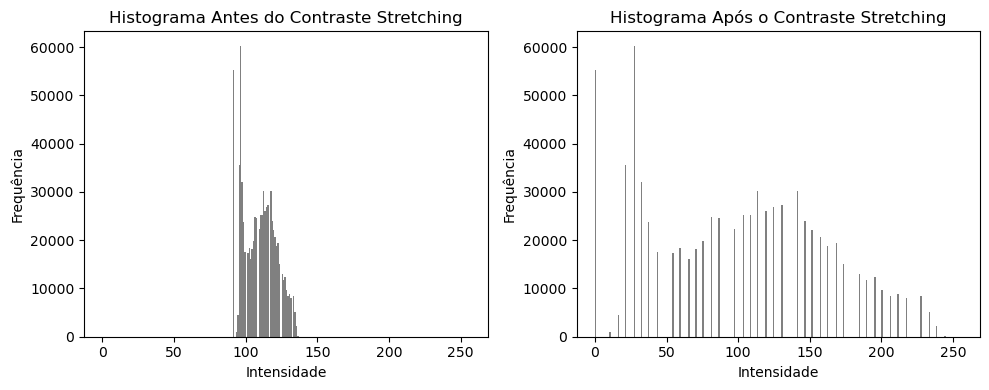

In [47]:
# Plotar os histogramas antes e depois
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(pollen_lavado.flatten(), bins=np.arange(257), color='gray', edgecolor='none')
plt.title('Histograma Antes do Contraste Stretching')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(stretched_pollen.flatten(), bins=np.arange(257), color='gray', edgecolor='none')
plt.title('Histograma Após o Contraste Stretching')
plt.xlabel('Intensidade')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

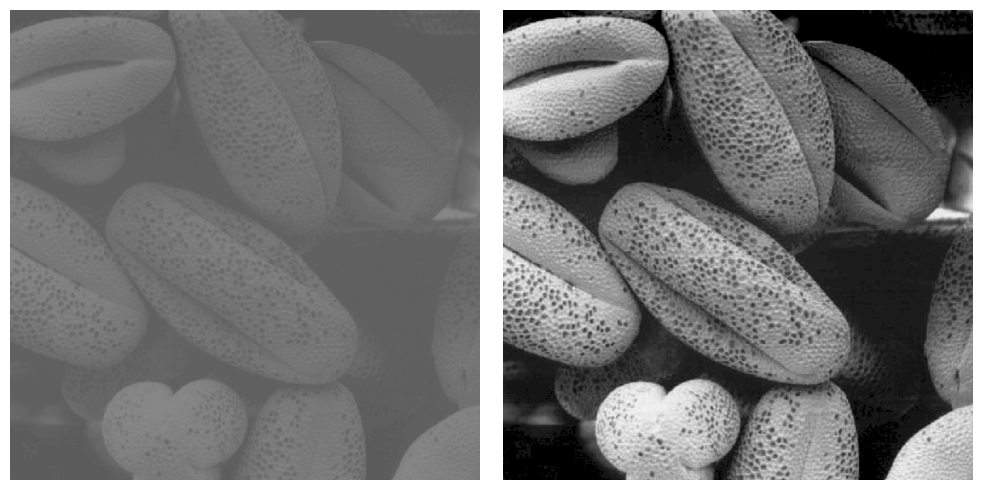

In [48]:
exibe_duas_imagens(pollen_lavado, stretched_pollen)

## Binarização de Imagem ou Image Thresholding

Técnica que transforma pixels a partir da média das intensidades da imagem original. Geralmente, pixels com intensidade abaixo da média da intensidade da imagem original recebem 0 valor 0 e os pixels acima ou iguais à média recebem valor 255. Ela é comumente usada para segmentar imagens em regiões de interesse com base nos níveis de intensidade dos pixels.

In [49]:
# continuaremos usando a imagem lavado do pólen

# Determinamos a média das intensidades da imagem
media_pollen = np.mean(pollen_lavado)

In [50]:
# Definição da função de binarização
def binarizacao(valor_pixel, media = 128):
    return 0 if valor_pixel < media else 255

In [51]:
# Transformamos a imagem usando a técnica de binarização
pollen_threshold = transforma_imagem(pollen_lavado, binarizacao, {'media': media_pollen})

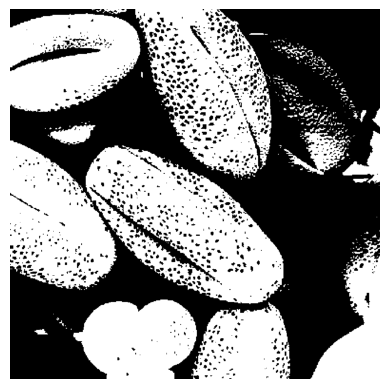

In [52]:
exibe_imagem(pollen_threshold)

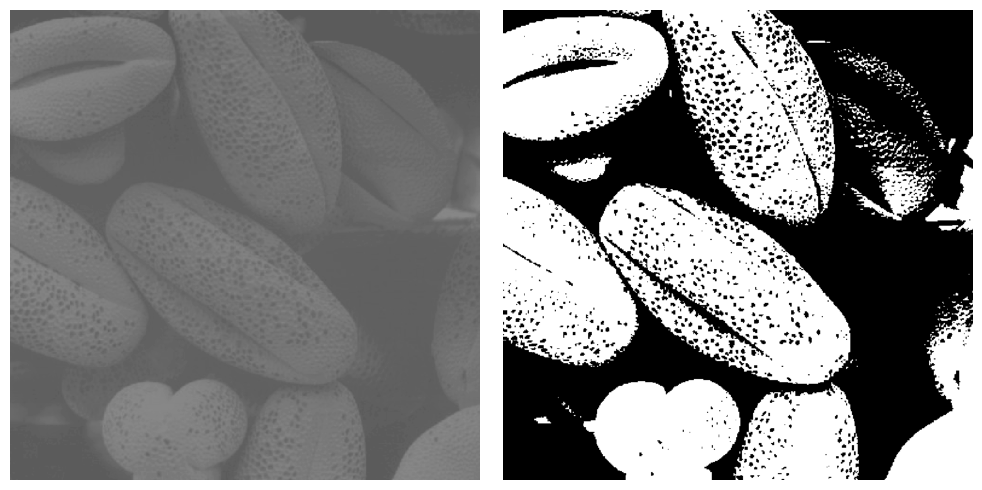

In [53]:
exibe_duas_imagens(pollen_lavado, pollen_threshold)

## Segmentação por Níveis de Intensidade ou Intensity-Level Slicing

Intensity-Level Slicing é uma técnica de processamento de imagem em que os pixels cujas intensidades estão dentro de um determinado intervalo são realçados ou modificados, enquanto os pixels fora desse intervalo permanecem inalterados. Ela é comumente usada para realçar ou destacar áreas específicas de uma imagem com base em sua intensidade de cor ou nível de cinza.

In [54]:
angiograma_rim = tiff.imread(caminho_imagens + "kidney.tif").astype(np.int32)

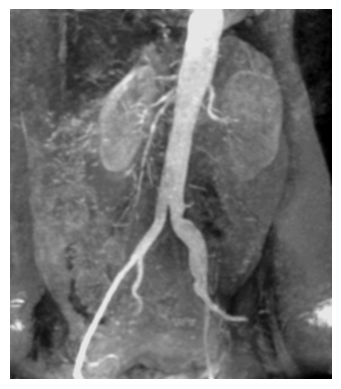

In [55]:
exibe_imagem(angiograma_rim)

Aqui tentamos criar 2 funções para recriar os exemplos 3.12 b e c do livro, conforme abaixo:

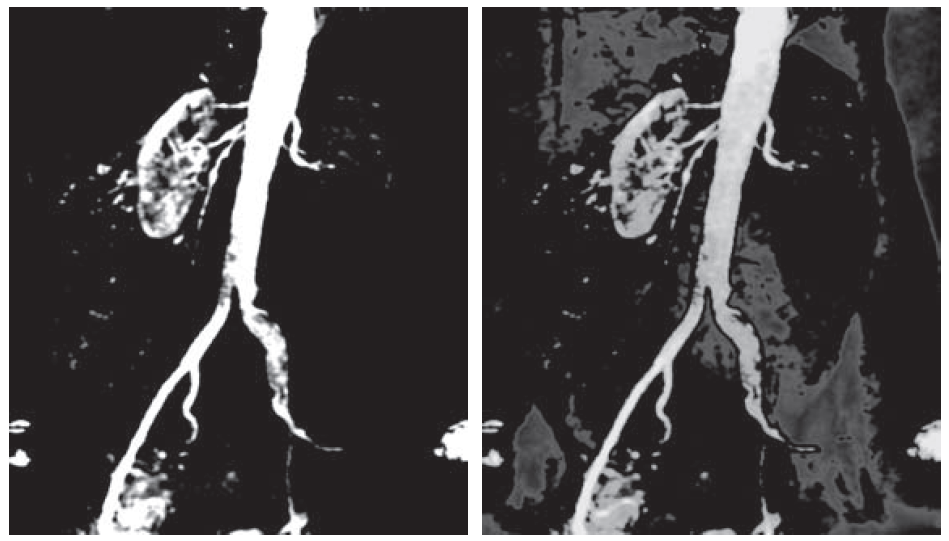

e como podemos ver, chegamos em algo aproximado.

In [56]:
def intensity_level_slicing_311a(valor_pixel):
    if 150 <= valor_pixel <= 240:
        return valor_pixel + 15
    else:
        return 25
    
def intensity_level_slicing_311b(valor_pixel):
    if 150 <= valor_pixel <= 240:
        return valor_pixel + 15
    elif 95 <= valor_pixel <= 149:
        return 15
    else:
        return 100

In [57]:
angiograma_ils_311a = transforma_imagem(angiograma_rim, intensity_level_slicing_311a)
angiograma_ils_311b = transforma_imagem(angiograma_rim, intensity_level_slicing_311b)

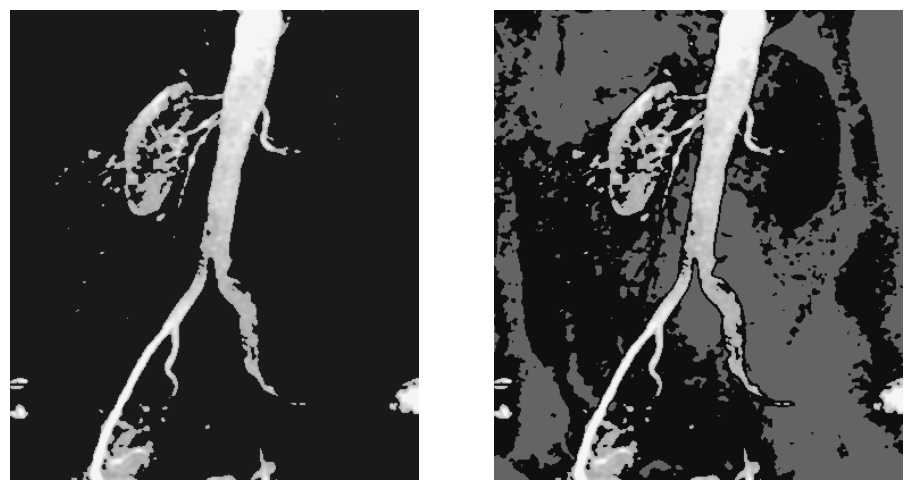

In [58]:
exibe_duas_imagens(angiograma_ils_311a, angiograma_ils_311b)

## Transformação de Fateamento bit a bit, ou Bit-Plane Slicing

O bit-plane slicing é uma técnica que envolve extrair os bits individuais dos valores de intensidade dos pixels em uma imagem e reorganizá-los em diferentes planos de bits. É possível gerar, para uma imagem de 8 bits, até 8 imagens individuais. É comum utilizar essa técnica para comprimir imagens, como vamos perceber em seguida.

In [59]:
dollar = tiff.imread(caminho_imagens + "dollar.tif")

In [60]:
# a imagem tem 8 bits, como imaginamos, então vamos fazer um plano para cada um dos 8 bits

# pegamos a dimensão da imagem
altura, largura = dollar.shape

# criamos um array de 8 planos, um para cada bit, todos na mesma dimensão da imagem
planos = [np.zeros((altura, largura), dtype=np.uint8) for i in range(8)]

In [61]:
# Iteramos pelas linhas e colunas e extrair os bits a partir dos valores de intensidade dos pixels
# e atribuir a cada plano de bits
for i in range(altura):
    for j in range(largura):
        valor_pixel = dollar[i, j]
        # Converter o valor do pixel para binário e preencher com zeros à esquerda para ter 8 bits, se necessário
        pixel_binario = format(valor_pixel, '08b')
        
        # Atribuir cada bit aos planos de bits correspondentes
        for b in range(8):
            # Para entender, por exemplo, para um pixel de intensidade 194, pixel_binario vai ser 11000010
            # Ao fazer este loop ele vai começar do bit mais significativo para o menos significativo
            # desta forma, para armazenar a intensidade correta de cada plano, multiplicamos o valor do bit
            # (0 ou 1) pela intensidade correspondente de cada plano. Por exemplo, para o plano correspondente
            # ao bit mais significativo, temos que multiplocar 1 por 2 elevado à 7. Desta forma, ficamos com:
            planos[b][i, j] = int(pixel_binario[b]) * 2 ** (7 - b)

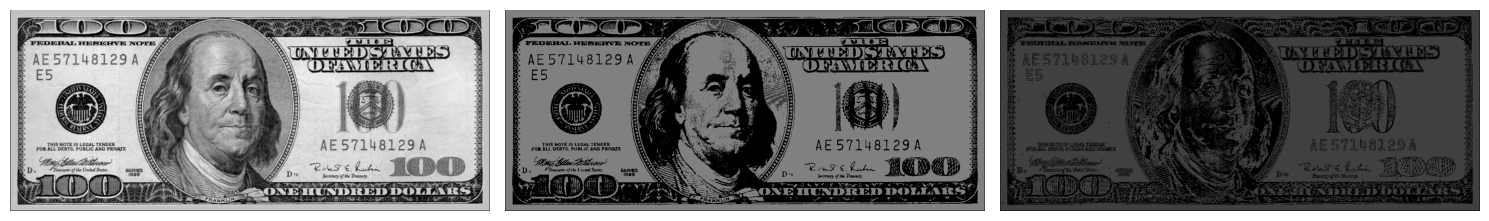

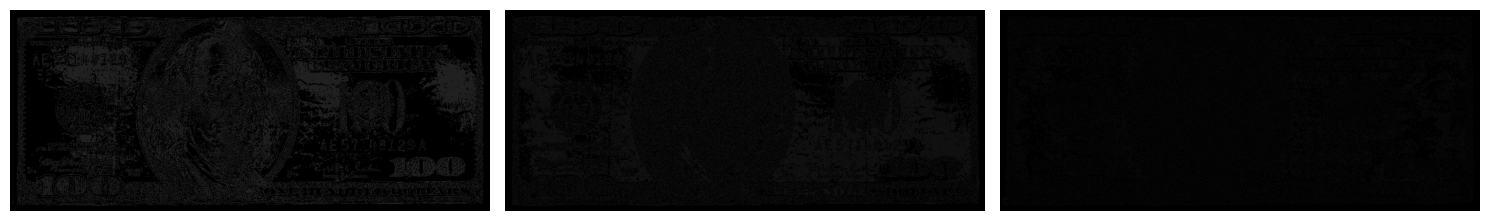

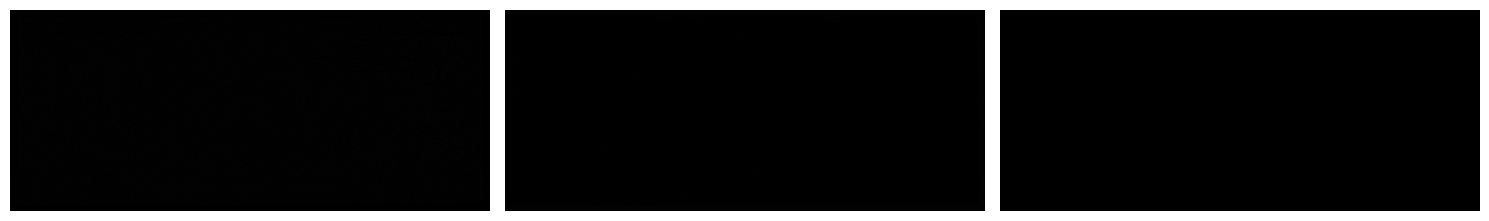

In [62]:
exibe_tres_imagens(dollar, planos[0], planos[1])
exibe_tres_imagens(planos[2], planos[3], planos[4])
exibe_tres_imagens(planos[5], planos[6], planos[7])

É possível ver que apenas com os 3 primeios planos, 0, 1 e 2, correspondente aos 3 bits mais significativos, é possível recriar a imagem praticamente idêntica, ao menos, visualmente, à imagem original, economizando espaço de armazenamento dos outros 5 bits.

Para visualizar melhor os planos 3 à 7, somamos 64 em cada um destes:

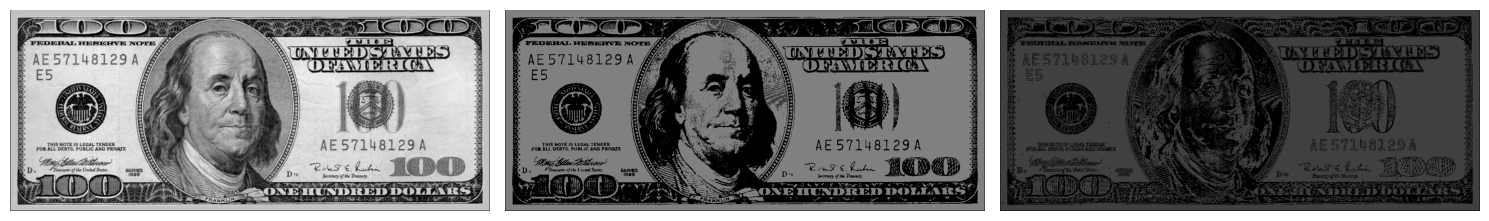

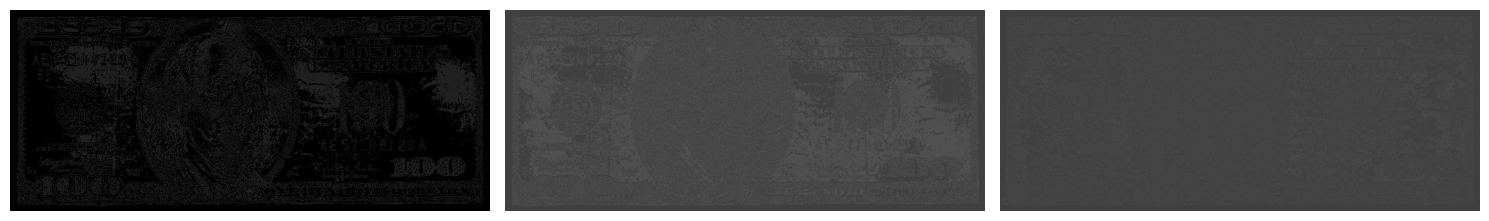

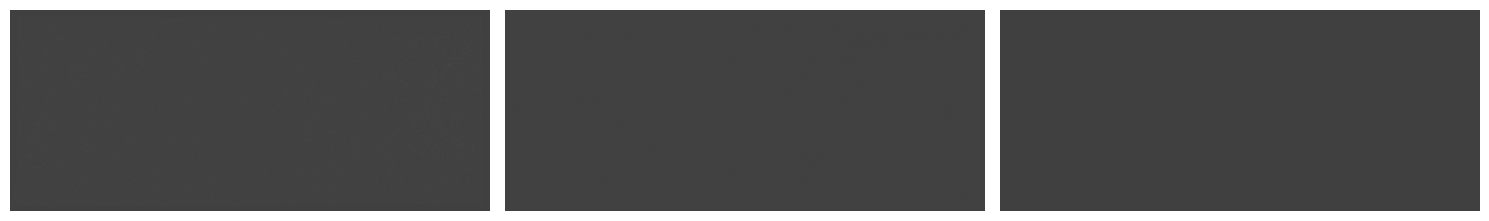

In [63]:
exibe_tres_imagens(dollar, planos[0], planos[1])
exibe_tres_imagens(planos[2], planos[3] + 64, planos[4] + 64)
exibe_tres_imagens(planos[5] + 64, planos[6] + 64, planos[7] + 64)

Mesmo assim, não dá pra perceber praticamente nenhuma informação nos planos dos bits 3 a 7.

Dependendo do objetivo e da necessidade, é suficiente manter apenas um, dois ou três destes planos. Abaixo temos a imagem recriada com apenas os 3 primeiros planos.

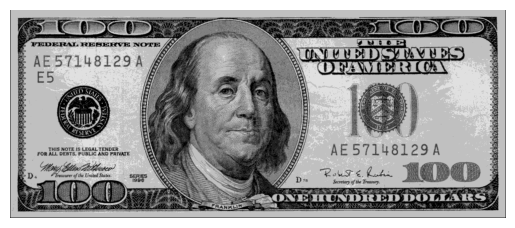

In [64]:
exibe_imagem(planos[0] + planos[1] + planos[2])

Para fins didaticos, recriamos a imagem fazendo a soma dos 8 planos:

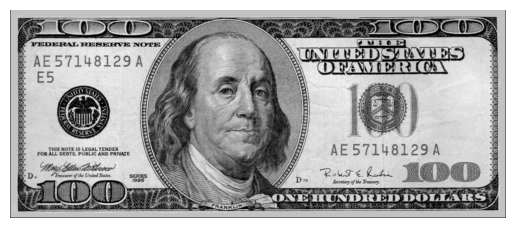

In [65]:
dollar_recriada = sum(planos)
exibe_imagem(dollar_recriada)

Abaixo exibimos a imagem original e correspondente à soma de apenas os 3 primeiros planos, para comparação

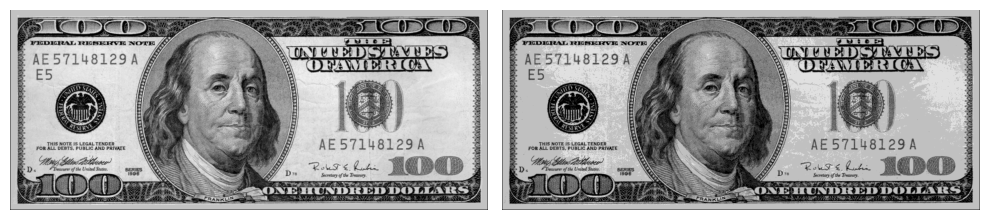

In [66]:
exibe_duas_imagens(dollar, planos[0] + planos[1] + planos[2])

## Equalização de Histograma

Equalização de Histograma é uma técnica de processamento que visa ajustar o contraste de uma imagem a partir do seu histograma. Essa técnica é muito utilizada para melhorar a qualidade visual de imagens, destacando detalhes e tornando-as mais perceptíveis.

A técnica inicia-se com o cálculo do histograma da imagem original, que representa a distribuição de intensidades. A partir desse histograma, é calculada a função de distribuição acumulada (CDF), representada por:

$$CDF(i) = \sum_{k=0}^{i} PDF(k)$$

onde $ PDF(k) $ é a função de densidade de probabilidade para a intensidade $k$. A CDF acumula as probabilidades ao longo das intensidades, resultando em uma distribuição cumulativa.

Em seguida, é calculada a função de transformação de intensidade $ T $, que mapeia as intensidades originais para novos valores, visando uma distribuição mais uniforme. A função de transformação é dada por:

$$ T(i) = \text{round}\left(\frac{{CDF(i) - \text{min}(CDF)}}{{\text{max}(CDF) - \text{min}(CDF)}} \times (L - 1)\right) $$

onde $ L $ é o número de níveis de intensidade na imagem (256 para imagens em tons de cinza de 8 bits).

Por fim, a transformação é aplicada à imagem original, pixel a pixel, produzindo uma imagem equalizada. Essa nova imagem possui um histograma mais uniforme, o que melhora o contraste e a visibilidade de detalhes.

A equalização de histograma tem várias aplicações práticas, como melhoria de imagens médicas, análise de imagens de satélite e processamento de imagens para reconhecimento de padrões em visão computacional, porém ela não produz bons resultados se houver uma quantidade muito grande de pixels à esquerda ou à direita (muitas áreas claras ou muitas áreas escuras). Nestes casos, outras técnicas podem ser aplicadas, incluindo a equalização de histograma localizada.

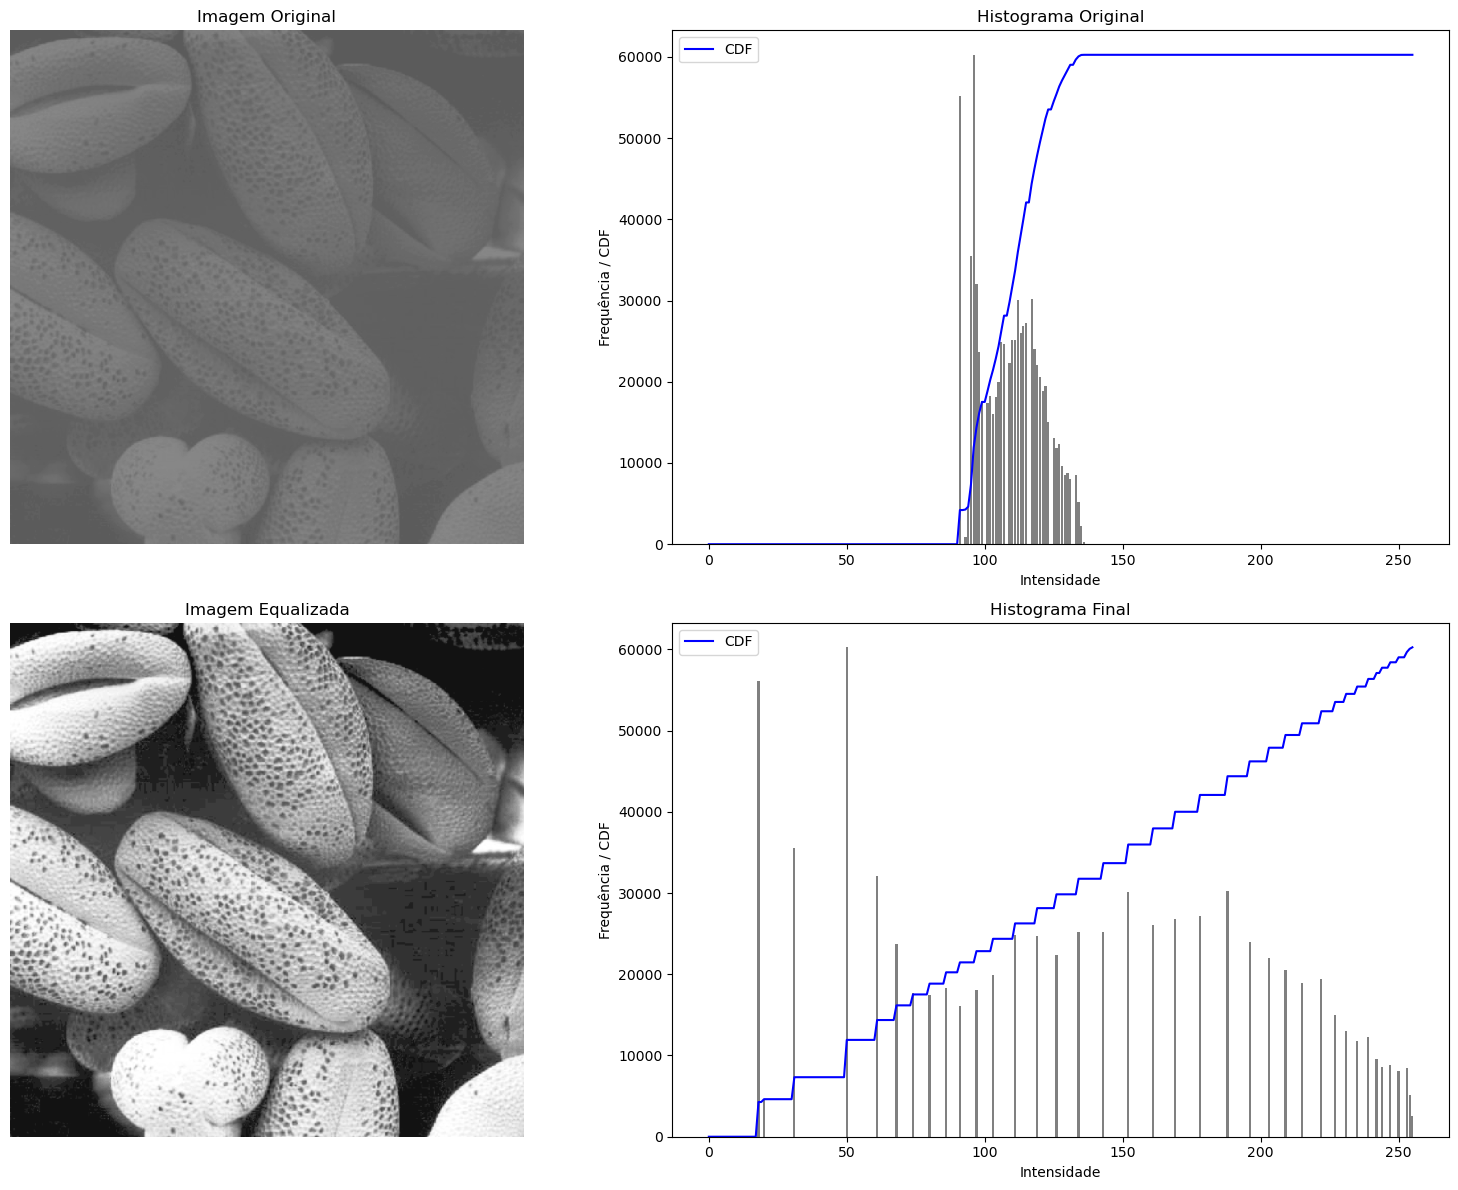

In [84]:
# Para fins didáticos e de estudo, não foram utilizadas bibliotecas
# ou funções que trazem o mesmo resultado de forma mais rápida ou 
# prática, como para o cálculo do histograma e da CDF

# Função para calcular o histograma de uma imagem
def calcular_histograma(imagem, intensidades):
    histograma = np.zeros(len(intensidades))
    for pixel in imagem.flatten():
        histograma[pixel] += 1
    return histograma

# Função para calcular a função de distribuição acumulada (CDF)
def calcular_cdf(histograma):
    cdf = np.zeros(len(histograma))
    soma = 0
    for i in range(len(histograma)):
        soma += histograma[i]
        cdf[i] = soma
    # retorna a CDF normalizada [0, 1]
    return cdf / np.max(cdf)

# Função para calcular a função de transformação de intensidade
def calcular_funcao_transformacao(cdf):
    return np.round(cdf * 255).astype(int)

# Função para aplicar a função de transformação aos pixels da imagem original
def aplicar_transformacao(imagem, funcao_transformacao):
    imagem_transformada = np.zeros_like(imagem)
    for i in range(imagem.shape[0]):
        for j in range(imagem.shape[1]):
            # A função de transformação atua como uma tabela de consulta,
            # onde para cada valor de intensidade dado mapeia-se para o valor
            # correspondente para a imagem equalizada. Cada pixel da imagem
            # original tem sua intensidade, então, substituído pelo valor
            # correspondente nessa tabela.
            pixel_original = imagem[i, j]
            pixel_transformado = funcao_transformacao[pixel_original]
            imagem_transformada[i, j] = pixel_transformado
    return imagem_transformada

# Função para garantir que os valores resultantes estejam no intervalo [0, 255]
def mapear_para_intervalo(imagem_transformada):
    return (imagem_transformada / np.max(imagem_transformada) * 255).astype(int)

imagem_original = pollen_lavado

# Definir o intervalo de intensidades [0, 255]
intensidades = np.arange(256)

# Etapa 1: Calcular o histograma da imagem original
histograma_original = calcular_histograma(imagem_original, intensidades)

# Etapa 2: Calcular a função de distribuição acumulada (CDF)
cdf = calcular_cdf(histograma_original)

# Etapa 3: Calcular a função de transformação de intensidade
funcao_transformacao = calcular_funcao_transformacao(cdf)

# Etapa 4: Aplicar a função de transformação aos pixels da imagem original
imagem_transformada = aplicar_transformacao(imagem_original, funcao_transformacao)

# Etapa 5: Mapear os valores resultantes para o intervalo [0, 255]
imagem_final = mapear_para_intervalo(imagem_transformada)

# Etapa 6 (opcional): Calcular o histograma da imagem equalizada
histograma_final = calcular_histograma(imagem_final, intensidades)

# Etapa 7 (opcional): Calcular a função de distribuição acumulada (CDF) final
cdf_final = calcular_cdf(histograma_final)

# Visualizar o resultado
fig, axs = plt.subplots(2, 2, figsize = (16, 12))

axs[0, 0].imshow(imagem_original, cmap = 'gray', vmin = 0, vmax = 255)
axs[0, 0].set_title('Imagem Original')
axs[0, 0].axis('off')

axs[0, 1].bar(intensidades, histograma_original, color = 'gray')
axs[0, 1].plot(intensidades, cdf * np.max(histograma_original), color = 'blue', label = 'CDF')
axs[0, 1].set_title('Histograma Original')
axs[0, 1].set_xlabel('Intensidade')
axs[0, 1].set_ylabel('Frequência / CDF')
axs[0, 1].legend()

axs[1, 0].imshow(imagem_final, cmap = 'gray', vmin = 0, vmax = 255)
axs[1, 0].set_title('Imagem Equalizada')
axs[1, 0].axis('off')

axs[1, 1].bar(intensidades, histograma_final, color = 'gray')
axs[1, 1].plot(intensidades, cdf_final * np.max(histograma_final), color = 'blue', label = 'CDF')
axs[1, 1].set_title('Histograma Final')
axs[1, 1].set_xlabel('Intensidade')
axs[1, 1].set_ylabel('Frequência / CDF')
axs[1, 1].legend()

plt.tight_layout()
plt.show()